# Import required libraries

In [1]:
import pandas as pd # data processing, csv files
import numpy as np  # linear algebra, library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices
import seaborn as sns #library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions. 
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# To create a list of Fake and True dataframes based on BERT & RoBERTa

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

## Data Pre-Processing

In [3]:
true["Target"]=0
fake["Target"]=1
frame = [fake, true]

In [4]:
combined_df = pd.concat(frame)
combined_df = combined_df.sample(frac=1.0, random_state=0)
combined_df.index = [i for i in range(combined_df.shape[0])]
combined_df

,title,text,subject,date,Target
0,Ex-Interpol chief says ready to testify for Ar...,BUENOS AIRES (Reuters) - Argentina s previous ...,worldnews,"December 20, 2017",0
1,U.S. warns North Korea of 'overwhelming' respo...,SEOUL (Reuters) - U.S. President Donald Trump’...,politicsNews,"February 3, 2017",0
2,Big security risks in Trump feud with spy agen...,WASHINGTON (Reuters) - An unprecedented pre-pr...,politicsNews,"January 13, 2017",0
3,France puts suspected militant under investiga...,PARIS (Reuters) - A suspected Islamist militan...,worldnews,"November 15, 2017",0
4,Rudy Giuliani Turns Into A Blithering Idiot W...,During a live CNN interview with Rudy Giuliani...,News,"August 11, 2016",1
...,...,...,...,...,...
44893,Trump to meet with retired U.S. Admiral Stavri...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,"December 5, 2016",0
44894,HELL FREEZES OVER…Or Does It? [Video] Hundreds...,It only took what 14 years for this to happen?...,left-news,"Dec 8, 2015",1
44895,U.S.-backed SDF say attacked by Russian jets i...,BEIRUT (Reuters) - U.S.-backed Syrian militias...,worldnews,"September 25, 2017",0
44896,"EU: spot checks show confusion, not conspiracy...",NAIROBI (Reuters) - Observers found some techn...,worldnews,"September 14, 2017",0


In [5]:
#Drop unecessary attributes
combined_df = combined_df.drop("subject", axis=1)
combined_df = combined_df.drop("date", axis=1)

#Convert to lowercase
combined_df['title'] = combined_df['title'].apply(lambda x: x.lower())

#Remove punctuation
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
combined_df['title'] = combined_df['title'].apply(punctuation_removal)

#Remove English stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
combined_df['title'] = combined_df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Tokenization
#combined_df['title']= [word_tokenize(str(entry)) for entry in combined_df['title']]

combined_df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,text,Target
0,exinterpol chief says ready testify argentinas...,BUENOS AIRES (Reuters) - Argentina s previous ...,0
1,us warns north korea overwhelming response nuc...,SEOUL (Reuters) - U.S. President Donald Trump’...,0
2,big security risks trump feud spy agencies off...,WASHINGTON (Reuters) - An unprecedented pre-pr...,0
3,france puts suspected militant investigation k...,PARIS (Reuters) - A suspected Islamist militan...,0
4,rudy giuliani turns blithering idiot confronte...,During a live CNN interview with Rudy Giuliani...,1
...,...,...,...
44893,trump meet retired us admiral stavridis thursday,WASHINGTON (Reuters) - President-elect Donald ...,0
44894,hell freezes over…or video hundreds muslims de...,It only took what 14 years for this to happen?...,1
44895,usbacked sdf say attacked russian jets east syria,BEIRUT (Reuters) - U.S.-backed Syrian militias...,0
44896,eu spot checks show confusion conspiracy kenya...,NAIROBI (Reuters) - Observers found some techn...,0


# SVM Modelling

In [6]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
X = combined_df.copy()

score = []
kfold = StratifiedKFold(n_splits=5)

for train, valid in kfold.split(X, X.Target):
    X_train = X.loc[train]
    X_valid = X.loc[valid]
    y_train = X_train.pop("Target")
    y_valid = X_valid.pop("Target")
    
    vc = CountVectorizer()
    X_count_train = vc.fit_transform(X_train.title.values)
    X_count_valid = vc.transform(X_valid.title.values)
    
    SVM = svm.SVC(C=1.9, kernel='linear')
    SVM.fit(X_count_train, y_train)
    y_predicted = SVM.predict(X_count_valid)
    print(accuracy_score(y_valid, y_predicted))

vc = CountVectorizer()
df_count = vc.fit_transform(combined_df.title.values)
#np.append(df_count, df[pd.get_dummies(df["subject"]).columns.values].values)
df_count.shape

0.9494432071269487
0.9516703786191537
0.9493318485523385
0.9535583027063147
0.9487693507072057


(44898, 23401)

C:\Users\chong\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

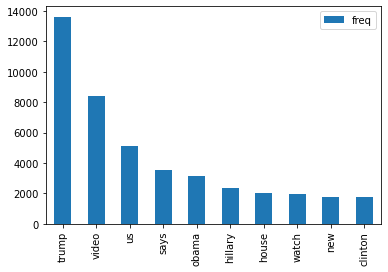

In [30]:
pd.DataFrame(df_count.sum(axis=0).T,
             index=vc.get_feature_names(),
             columns=['freq']).sort_values(by='freq',
                                           ascending=False).head(10).plot(kind='bar')

## AUC

In [31]:
from sklearn.metrics import roc_auc_score
y_predicted = SVM.predict(X_count_valid)
print('AUC: ', roc_auc_score(y_valid, y_predicted))

AUC:  0.9491022160429032


## Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_valid, y_predicted, labels=[0, 1]))

[[4096  187]
 [ 273 4423]]


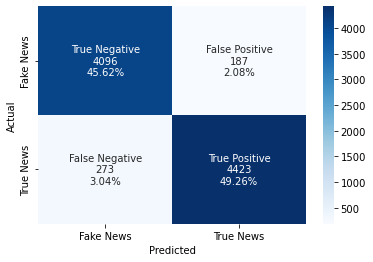

In [34]:
def confusion_matrix_visual(cf, group_names = None, categories = 'auto',
                            count = True, percent = True, cbar = True,
                            xyticks = True, xyplotlabels = True, sum_stats = True,
                            figsize = None, cmap = 'Blues', title = None):

    #Labels and info in matrix
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    #Figure parameters
    if figsize == None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        categories = False

    #Heatmap visualization
    plt.figure(figsize = figsize)
    sns.heatmap(cf,annot = box_labels, fmt= "", cmap = cmap, cbar = cbar, xticklabels = categories, yticklabels = categories)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig('conf.pdf')  

    if title:
        plt.title(title)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Fake News', 'True News']
cf_matrix = confusion_matrix(y_valid, y_predicted)
confusion_matrix_visual(cf_matrix, group_names = labels, categories = categories, cmap = 'Blues')

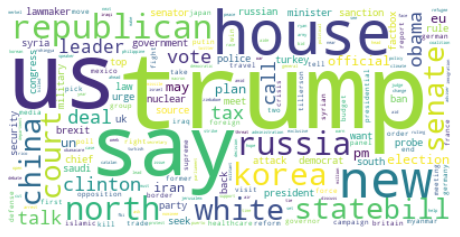

In [35]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

true_df = combined_df[combined_df['Target'] == 0]
tnews = " ".join(title for title in true_df.title)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(tnews)
# Display the generated Word Cloud
plt.figure(figsize = (8,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

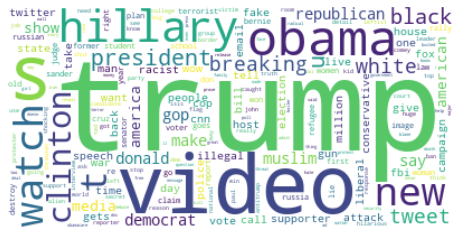

In [38]:
fake_df = combined_df[combined_df['Target'] == 1]
fnews = " ".join(title for title in fake_df.title)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(fnews)
# Display the generated Word Cloud
plt.figure(figsize = (8,5))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()